In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Evaluating Regression Models Exercises

Do you work for this exercise in either a jupyter notebook named `evaluate` within your `regression-exercises` repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name `evaluate` within your `regression-exercises` repo.

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


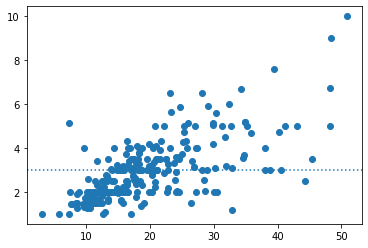

In [3]:
# plot data with baseline
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')

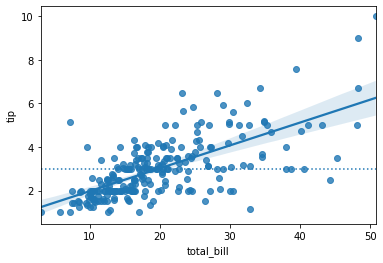

In [4]:
# line of best fit against the baseline
ax = sns.regplot(x="total_bill", y="tip", data=df)
plt.axhline(df.tip.mean(), ls = ':')

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
#Create baseline
df['yhat_baseline'] = df['tip'].mean()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279


In [6]:
from statsmodels.formula.api import ols
#create model
ols_model = ols('tip ~ total_bill', data=df).fit()
#compute predictions and add to original df
df['yhat'] = ols_model.predict(df.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


Text(0.5, 1.0, 'Baseline and OLS regression model')

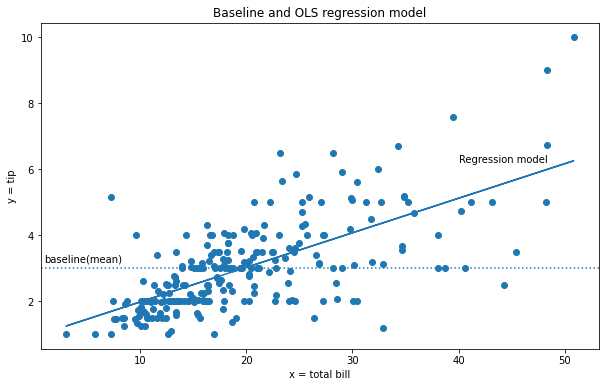

In [7]:
#plot 
fig = plt.figure(figsize = (10,6))
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')
plt.plot(df.total_bill, df.yhat)
plt.text(1, 3.2, 'baseline(mean)')
plt.text(40, 6.2, 'Regression model')
plt.xlabel('x = total bill')
plt.ylabel('y = tip')
plt.title('Baseline and OLS regression model')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

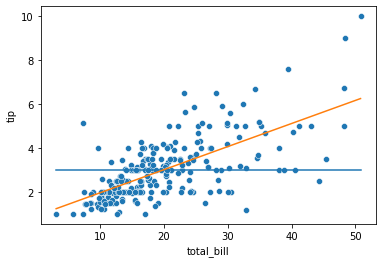

In [8]:
#another way to plot:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat_baseline', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat', data = df)

### 3. Plot the residuals for the linear regression model that you made.

In [9]:
df['residual'] = df.tip - df.yhat #subtracting actual from predicted
df['baseline_residual'] = df.tip - df.yhat_baseline

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


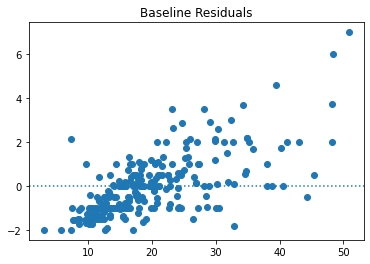

In [10]:
#plot residuals
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

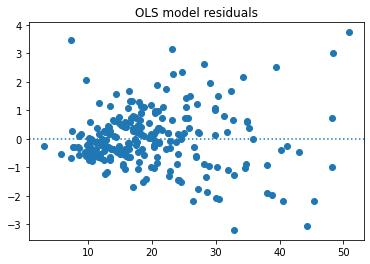

In [11]:
#plot residuals 
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

In [12]:
#From lesson: 
#Presence of trends in residual plots indicate that there is an uncaptured linear trend, 
#meaning we can still improve our model using independent features (in this case x(total_bill)).

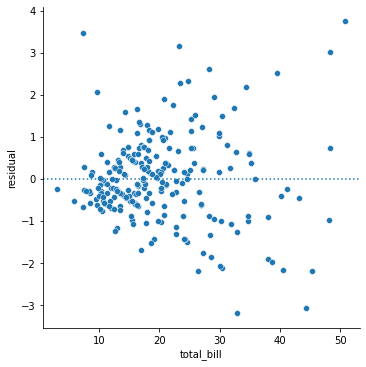

In [13]:
#plotting using seaborn
sns.relplot(x = 'total_bill', y = 'residual', data = df)
plt.axhline(0, ls = ':')

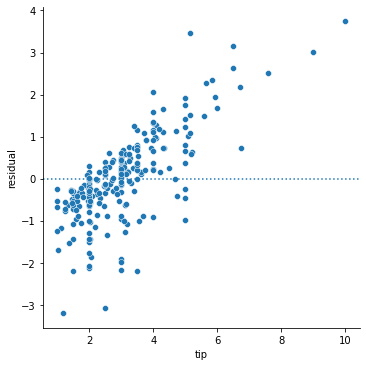

In [14]:
sns.relplot(x = 'tip', y = 'residual', data = df)
plt.axhline(0, ls = ':')

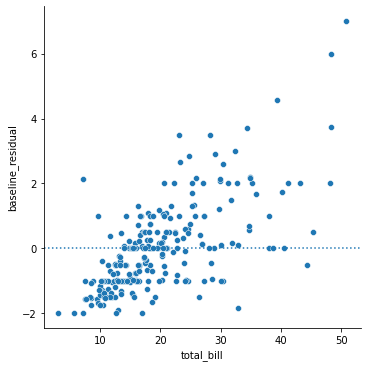

In [15]:
sns.relplot(x = 'total_bill', y = 'baseline_residual', data = df)
plt.axhline(0, ls = ':')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for **your model**.

In [16]:
#Sum of squared errors
#square each residual value
df['residual^2'] = df.residual**2
df

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,baseline_residual,residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,2.921721,3.805888
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-0.998279,3.150043
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-0.998279,1.693057
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.248279,1.085361


In [17]:
#SSE - Sum of Squared Errors
SSE = df['residual^2'].sum()
print("SSE = ", SSE)

SSE =  252.788743850776


In [18]:
#MSE - Mean Squared Errors
MSE = SSE/len(df)
print("MSE = ", MSE)

MSE =  1.036019442011377


In [19]:
#RMSE - Root Mean Squared Error
RMSE = sqrt(MSE)
print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


In [20]:
#ESS - Explained Sum of Squares
ESS = sum((df.yhat - df.tip.mean())**2)
print("ESS = ", ESS)

ESS =  212.4237331984042


In [21]:
#TSS - Total Sum of Squares
TSS = ESS + SSE
print("TSS = ", TSS)

TSS =  465.21247704918017


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the **baseline model** (i.e. a model that always predicts the average tip amount).

In [23]:
#sum of squared errors
df['baseline_residual^2'] = df.baseline_residual**2
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [25]:
#SSE - Sum of Squared Errors
SSE_baseline = df['baseline_residual^2'].sum()
print("SSE Baseline = ", SSE_baseline)

SSE Baseline =  465.2124770491804


In [26]:
#MSE - Mean Squared Errors
MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", MSE_baseline)

#or use sklearn
#mean_squared_error(df.tip, df.yhat)

MSE baseline =  1.906608512496641


In [27]:
#RMSE - Root Mean Squared Error
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

#sklearn method:
#mean_squared_error(df.tip, df.baseline, squared=False)

RMSE baseline =  1.3807999538298954


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [28]:
if SSE < SSE_baseline:
    print('Our model out performed our baseline')
    print('This model can be used to be evaluated more thoroughly')
else:
    print('The baseline out performed the model')
    
print("SSE Baseline = ", SSE_baseline)
print("SSE Model = ", SSE)

Our model out performed our baseline
This model can be used to be evaluated more thoroughly
SSE Baseline =  465.2124770491804
SSE Model =  252.788743850776


In [29]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


In [30]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,252.788744,465.212477
1,MSE,1.036019,1.906609
2,RMSE,1.017850,1.380800


In [31]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


### 7. What is the amount of variance explained in your model?

In [32]:
# Calculate R2
R2 = ESS/TSS
R2
# 46% of variance can be explained by the model

0.4566165863516763

In [33]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        09:43:03   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print('R2: ', ols_model.rsquared)

R2:  0.45661658635167646


In [35]:
print('R2: ', ols_model.rsquared_adj)

R2:  0.4543712003448651


In [36]:
#almost similar so that means it is a good model

In [37]:
print('Parameters: ',ols_model.params)

Parameters:  Intercept     0.920270
total_bill    0.105025
dtype: float64


### 8. Is your model significantly better than the baseline model?

In [38]:
null_hypothesis = 'The Slope is equal to 0. Model is the same as the baseline'
alternative_hypothesis = 'Slope is not equal to 0. Model is different than the baseline'

confidence_int = .95
alpha = 1 - confidence_int

In [39]:
f_pval = ols_model.f_pvalue

print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0


In [40]:
if f_pval < alpha:
    print(f'Reject the null hypothesis and move foward with alternative: {alternative_hypothesis}')
    print('Conclude that regression model fits the data better than the model with no independent variables, meaning the independent variables in model improve the fit')
else: 
    print('Fail to reject the null hypothesis.')
    print('It is probably better to stop using this set of features.')

Reject the null hypothesis and move foward with alternative: Slope is not equal to 0. Model is different than the baseline
Conclude that regression model fits the data better than the model with no independent variables, meaning the independent variables in model improve the fit


### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [47]:
#create a residual plot

def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

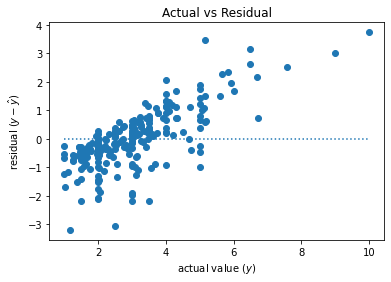

In [48]:
plot_residuals(df.tip, df.yhat)

In [49]:
#returns values for SSE, MSE, RMSE, ESS, and TSS

def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def regression_errors(actual, predicted):
    return pd.Series({'sse': sse(actual, predicted), 
                      'ess': ess(actual, predicted), 
                      'tss': tss(actual), 
                      'mse': mse(actual, predicted), 
                      'rmse': rmse(actual, predicted)})

In [52]:
regression_errors(df.tip, df.yhat)

sse     252.788744
ess     212.423733
tss     465.212477
mse       1.036019
rmse      1.017850
dtype: float64

In [53]:
#computes SSE, MSE, and RMSE for baseline model
def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {'sse': sse(actual, predicted), 
            'mse': mse(actual, predicted), 
            'rmse': rmse(actual, predicted)}

In [54]:
baseline_mean_errors(df.tip)

{'sse': 465.2124770491804,
 'mse': 1.906608512496641,
 'rmse': 1.3807999538298954}

In [55]:
#returns true if model performs better than baseline, otherwise false
def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [56]:
better_than_baseline(df.tip, df.yhat)

True

In [57]:
#takes ols model as input 
#and returns the amount of variance explained in model
#and the value telling whether model is significantly better than the baseline model

def model_significance(ols_model):
    return {'r^2 -- variance explained': ols_model.rsquared, 
            'p-value -- P(data|model == baseline)': ols_model.f_pvalue}

In [58]:
model_significance(ols_model)

{'r^2 -- variance explained': 0.45661658635167646,
 'p-value -- P(data|model == baseline)': 6.692470646863376e-34}

### 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [59]:
from pydataset import data

mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


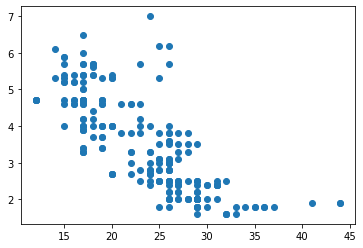

In [60]:
plt.scatter(mpg.hwy, mpg.displ)

In [61]:
model1 = ols('hwy ~ displ', data=mpg).fit()  
predictions = model1.predict(mpg.displ)

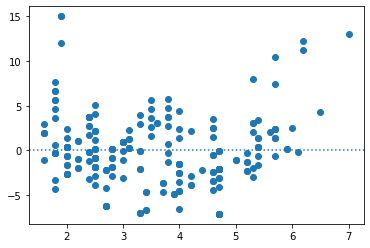

In [62]:
plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

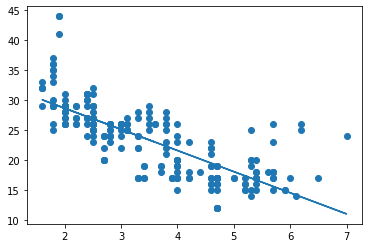

In [63]:
plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)

In [65]:
import evaluate

In [66]:
evaluate.regression_errors(mpg.hwy, predictions)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [67]:
evaluate.better_than_baseline(mpg.hwy, predictions)

True

In [68]:
model_significance(model1)

{'r^2 -- variance explained': 0.5867866723989039,
 'p-value -- P(data|model == baseline)': 2.0389744555910457e-46}

In [69]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.04e-46
Time:                        10:18:12   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""